In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings

# Suppress all warnings within this block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [43]:
parts_data = pd.read_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/final_project/data/Project_Data/cleaned_parts_data.csv')

parts_data = parts_data.drop(columns=['Unnamed: 0'])

parts_data.head(10)

,Part Number,Category,Description,Supplier Name,Margin %,Margin,Price,Quantity,Sales Last Month,Sales Last 3 Months,...,Gross Profit - Mar,Gross Profit - Apr,Gross Profit - May,Gross Profit - Jun,Gross Profit - Jul,Gross Profit - Aug,Gross Profit - Sep,Gross Profit - Oct,Gross Profit - Nov,Gross Profit - Dec
0,0,PM1,return spring,triumph motorcycles,51.93,3.77,7.26,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0 580 463 999,ACC,euro motorelectrics bosch,euro motorelectrics,63.17,397.99,629.99,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0........0,ACC,0........0,parts canada/power twins,0.00,0.00,0.00,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00-0450,ACC,"screw, gearbox,inspec&",motovan,76.41,1.49,1.95,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00-548588,ATA,tube 150/90- 15 centre90' stem,butler maps inc,28.01,5.60,19.99,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,00-F01740401,ACC,turn signal light control,motowest,39.54,66.03,166.99,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,00-F02600371,ACC,1399 belt drive,motowest,42.55,22.12,51.99,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,00-G01702301,ACC,1183-rear right indicator assy,motowest,40.16,13.37,33.29,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,00-H01701071,ACC,"1182- lens, turn signal (sq",motowest,51.70,6.98,13.50,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,00-SC6S,ACC,"usi 6"" steal bar",motovan,85.00,84.99,99.99,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
parts_data.shape

(102582, 64)

In [45]:
parts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102582 entries, 0 to 102581
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Part Number                     102582 non-null  object 
 1   Category                        102582 non-null  object 
 2   Description                     102582 non-null  object 
 3   Supplier Name                   102582 non-null  object 
 4   Margin %                        102582 non-null  float64
 5   Margin                          102582 non-null  float64
 6   Price                           102582 non-null  float64
 7   Quantity                        102582 non-null  float64
 8   Sales Last Month                102582 non-null  int64  
 9   Sales Last 3 Months             102582 non-null  int64  
 10  Sales Last 6 Months             102582 non-null  int64  
 11  Sales Last 9 Months             102582 non-null  int64  
 12  Sales Last 12 Mo

In [46]:
parts_data.describe()

,Margin %,Margin,Price,Quantity,Sales Last Month,Sales Last 3 Months,Sales Last 6 Months,Sales Last 9 Months,Sales Last 12 Months,Sales Last 2 Years,...,Gross Profit - Mar,Gross Profit - Apr,Gross Profit - May,Gross Profit - Jun,Gross Profit - Jul,Gross Profit - Aug,Gross Profit - Sep,Gross Profit - Oct,Gross Profit - Nov,Gross Profit - Dec
count,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,...,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,102582.000000,102582.0,102582.0,102582.0,102582.0
mean,39.557403,79.310509,218.977901,0.515671,0.040036,0.113139,0.189926,0.578542,0.657318,0.960568,...,3.744185,3.502412,4.148171,4.657904,3.732871,0.267425,0.0,0.0,0.0,0.0
std,310.485047,230.595634,561.046433,5.137419,1.177174,2.979828,4.838089,7.666797,8.991258,14.661121,...,59.286526,56.999329,60.380472,62.557140,71.424365,10.787432,0.0,0.0,0.0,0.0
min,-98600.000000,-20000.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-540.990000,-1256.990000,-1637.220000,-2015.040000,-579.990000,-389.990000,0.0,0.0,0.0,0.0
25%,32.250000,6.830000,18.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,38.245000,25.810000,68.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,48.830000,86.800000,231.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,100.000000,15299.000000,29060.990000,554.000000,216.000000,421.000000,695.000000,850.000000,1137.000000,2196.000000,...,5893.990000,4000.990000,4318.990000,4199.960000,10250.990000,1009.990000,0.0,0.0,0.0,0.0


In [47]:
parts_data.columns

Index(['Part Number', 'Category', 'Description', 'Supplier Name', 'Margin %',
       'Margin', 'Price', 'Quantity', 'Sales Last Month',
       'Sales Last 3 Months', 'Sales Last 6 Months', 'Sales Last 9 Months',
       'Sales Last 12 Months', 'Sales Last 2 Years', 'Sales Last 3 Years',
       'Sales Last 4 Years', 'Sales Last 5 Years', 'Sales Last 10 Years',
       'Months No Sale', 'Reorder Point', 'Sales - Jan', 'Sales - Feb',
       'Sales - Mar', 'Sales - Apr', 'Sales - May', 'Sales - Jun',
       'Sales - Jul', 'Sales - Aug', 'Sales - Sep', 'Sales - Oct',
       'Sales - Nov', 'Sales - Dec', 'Sales - 1st Qtr', 'Sales - 2nd Qtr',
       'Sales - 3rd Qtr', 'Sales - 4th Qtr', 'Sales - This Year',
       'Sales - Last Year', 'Cost Per Unit', 'Total Cost', 'Obsolete',
       'Gross Profit -  Last Month', 'Gross Profit -  Last 3 Months',
       'Gross Profit -  Last 6 Months', 'Gross Profit -  Last 9 Months',
       'Gross Profit -  Last 12 Months', 'Gross Profit -  Last 2 Years',
     

In [48]:
gross_profit_below_zero = ['Gross Profit -  Last Month', 'Gross Profit -  Last 3 Months',
       'Gross Profit -  Last 6 Months', 'Gross Profit -  Last 9 Months',
       'Gross Profit -  Last 12 Months', 'Gross Profit -  Last 2 Years',
       'Gross Profit -  Last 3 Years', 'Gross Profit -  Last 4 Years',
       'Gross Profit -  Last 5 Years', 'Gross Profit -  Last 10 Years',
       'Total Gross Profit','Gross Profit - Jan', 'Gross Profit - Feb',
       'Gross Profit - Mar', 'Gross Profit - Apr', 'Gross Profit - May',
       'Gross Profit - Jun', 'Gross Profit - Jul', 'Gross Profit - Aug',
       'Gross Profit - Sep', 'Gross Profit - Oct', 'Gross Profit - Nov',
       'Gross Profit - Dec']
mask = parts_data[gross_profit_below_zero] < 0

cols = ['Part Number','Description', 'Supplier Name', 'Margin %',
       'Margin', 'Price', 'Quantity','Gross Profit -  Last Month', 'Gross Profit -  Last 3 Months',
       'Gross Profit -  Last 6 Months', 'Gross Profit -  Last 9 Months',
       'Gross Profit -  Last 12 Months', 'Gross Profit -  Last 2 Years',
       'Gross Profit -  Last 3 Years', 'Gross Profit -  Last 4 Years',
       'Gross Profit -  Last 5 Years', 'Gross Profit -  Last 10 Years',
       'Total Gross Profit','Gross Profit - Jan', 'Gross Profit - Feb',
       'Gross Profit - Mar', 'Gross Profit - Apr', 'Gross Profit - May',
       'Gross Profit - Jun', 'Gross Profit - Jul', 'Gross Profit - Aug',
       'Gross Profit - Sep', 'Gross Profit - Oct', 'Gross Profit - Nov',
       'Gross Profit - Dec']

result = parts_data[mask.values][cols]
result.to_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/final_project/data/Dealership_Data/negative_gross_profit.csv')

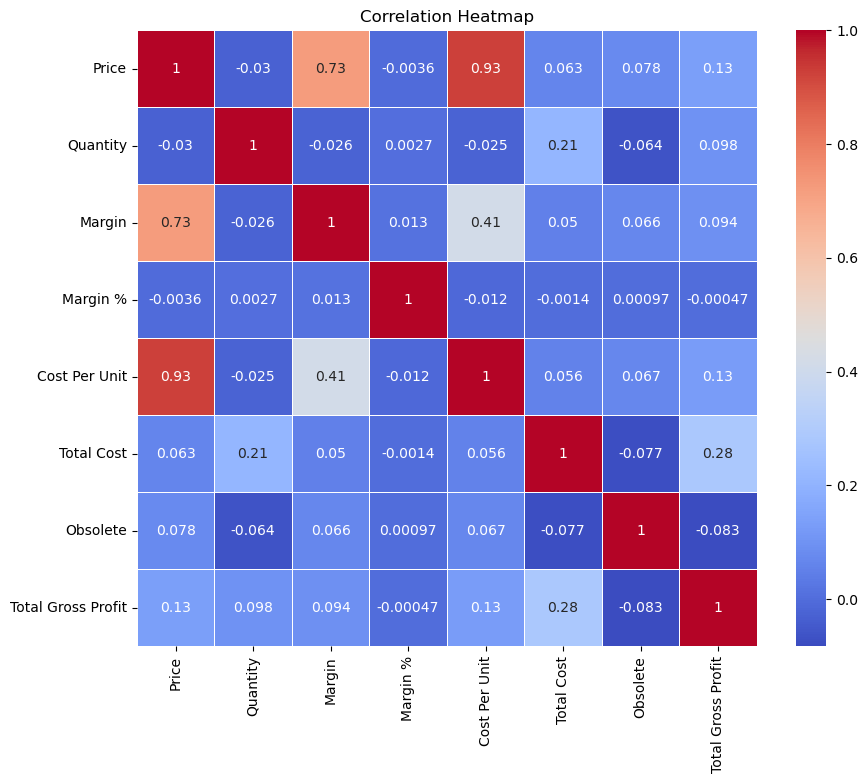

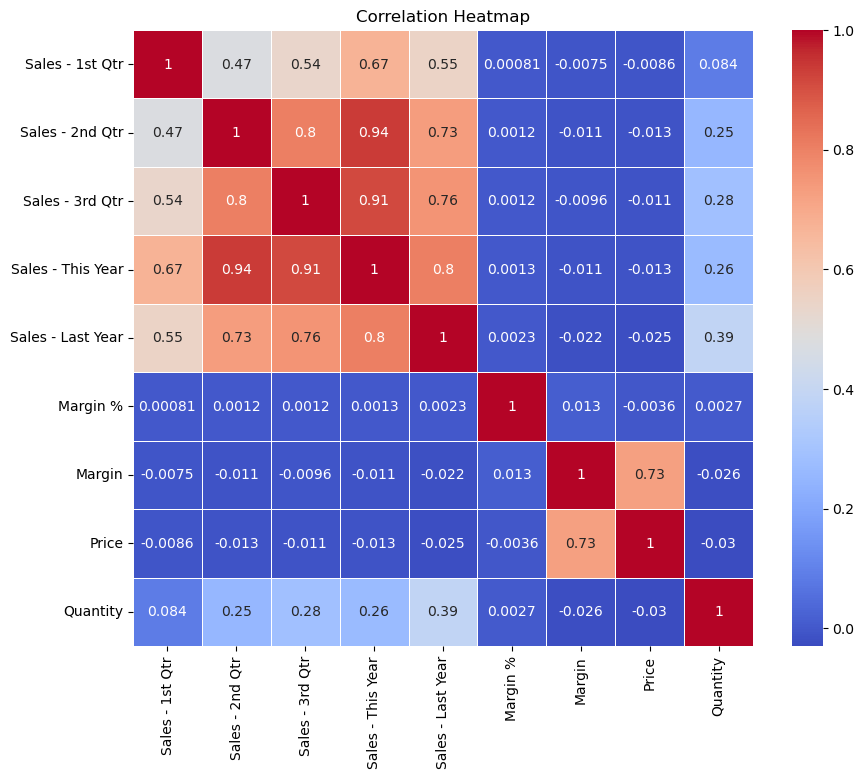

In [49]:
cols = ['Price', 'Quantity', 'Margin','Margin %','Cost Per Unit', 'Total Cost', 'Obsolete', 
        'Total Gross Profit', ]

cols_2 = ['Sales - 1st Qtr', 'Sales - 2nd Qtr','Sales - 3rd Qtr', 'Sales - This Year', 
'Sales - Last Year', 'Margin %','Margin', 'Price', 'Quantity']
corr_matrix = parts_data[cols].corr()

corr_matrix_2 = parts_data[cols_2].corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

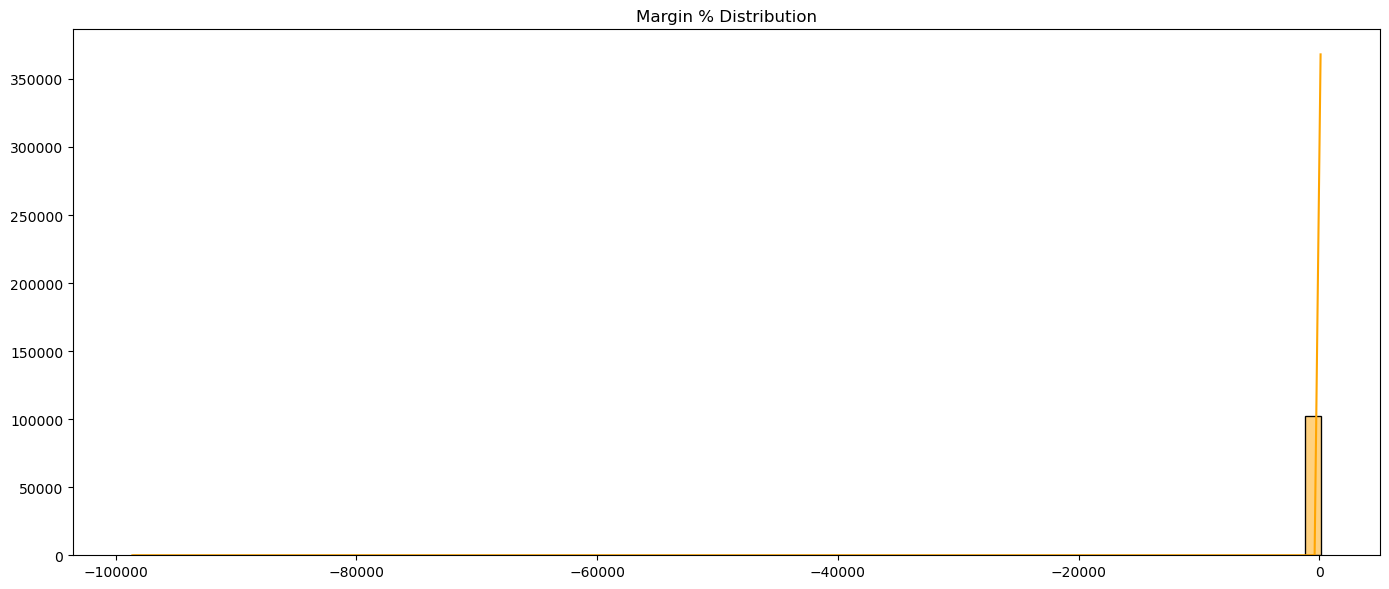

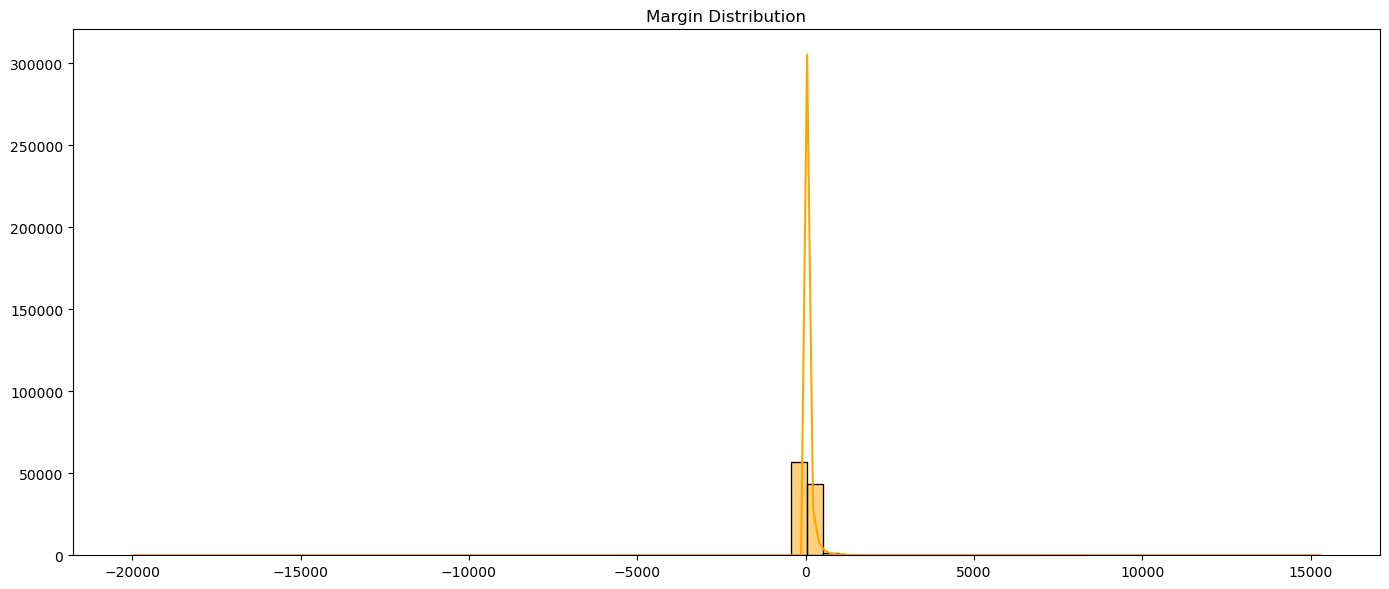

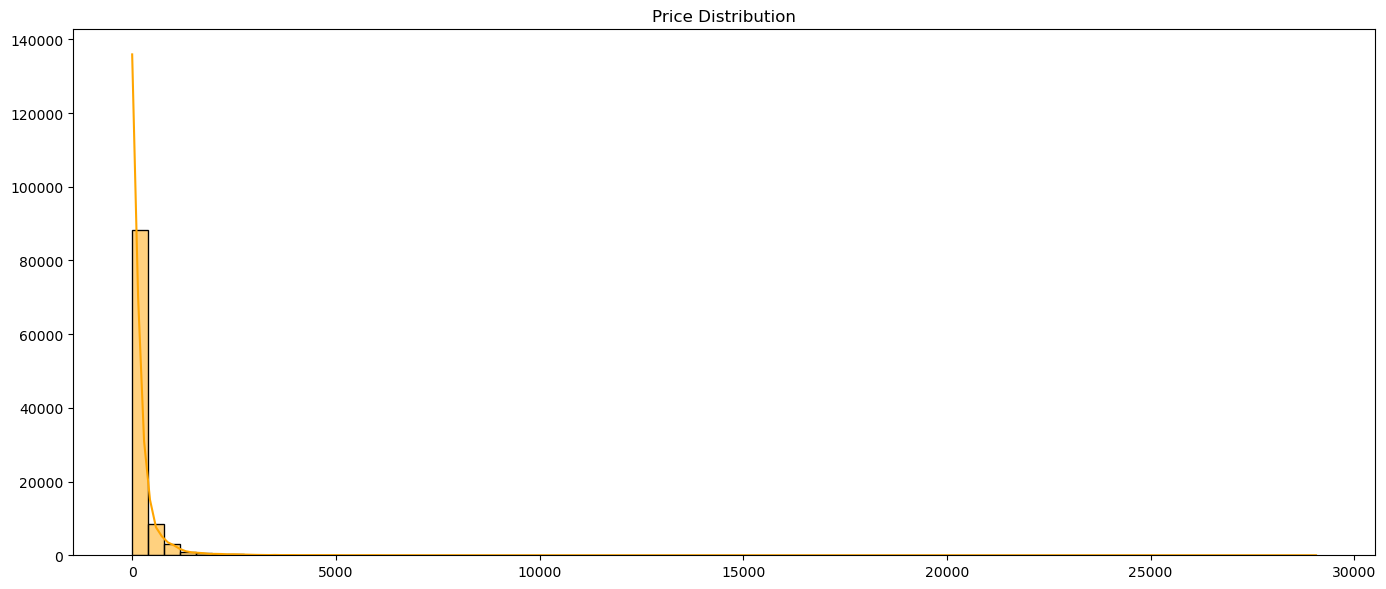

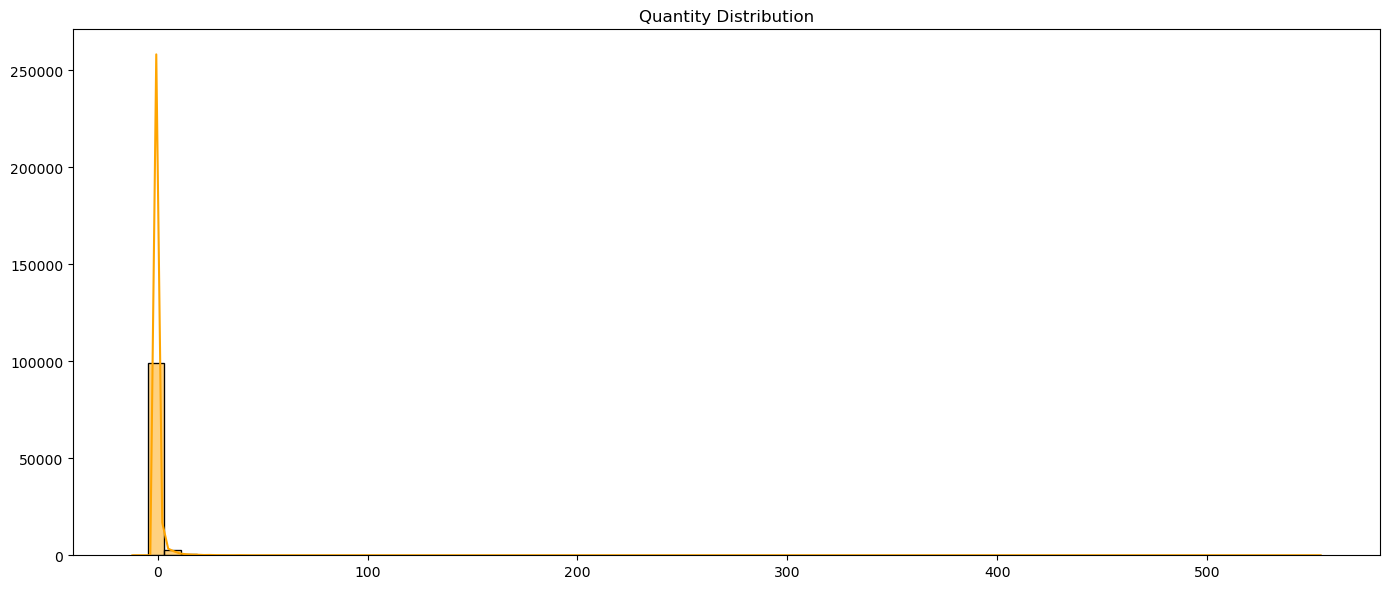

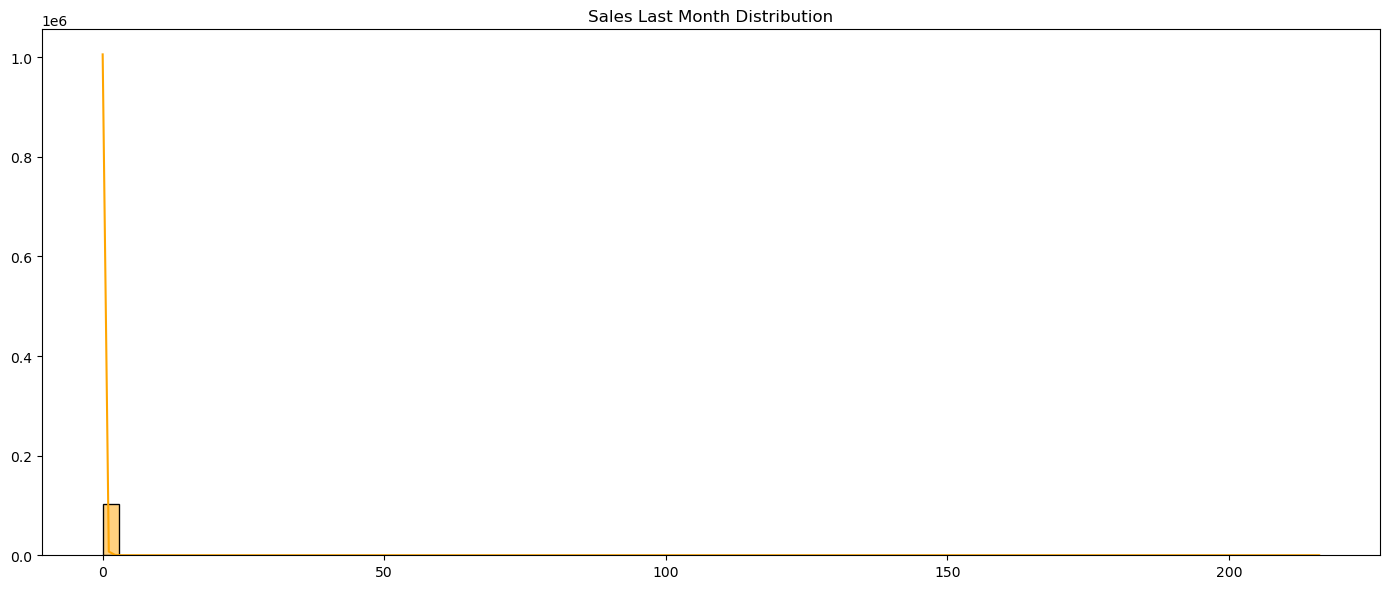

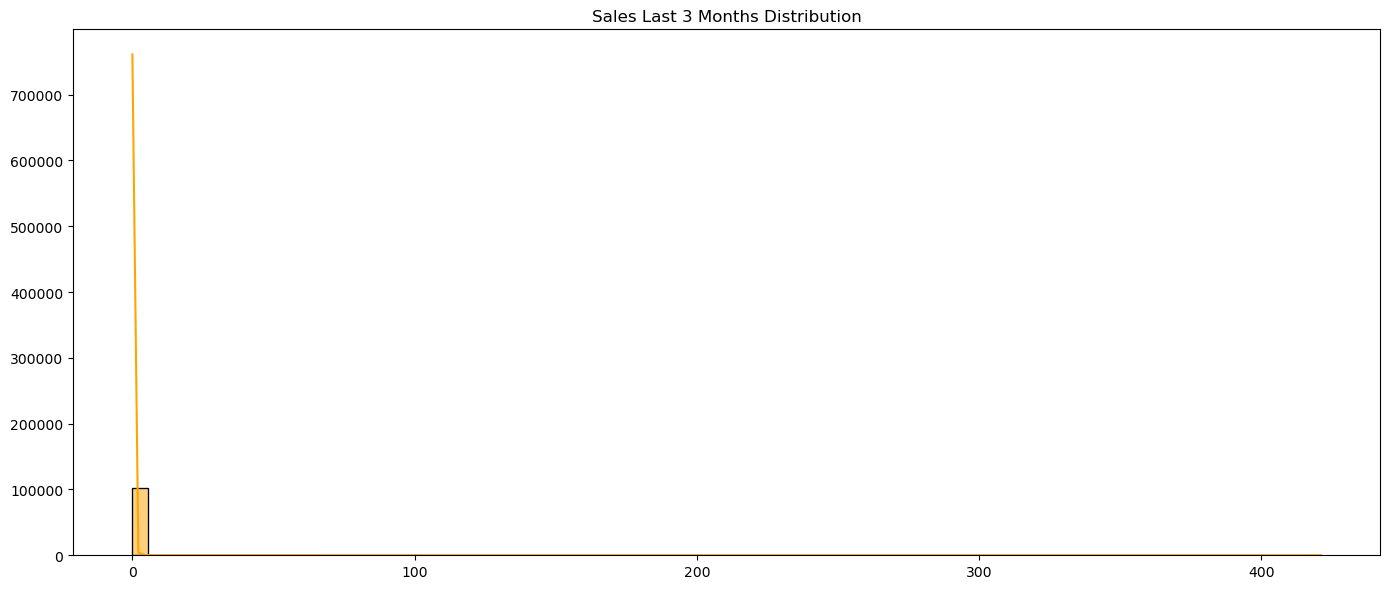

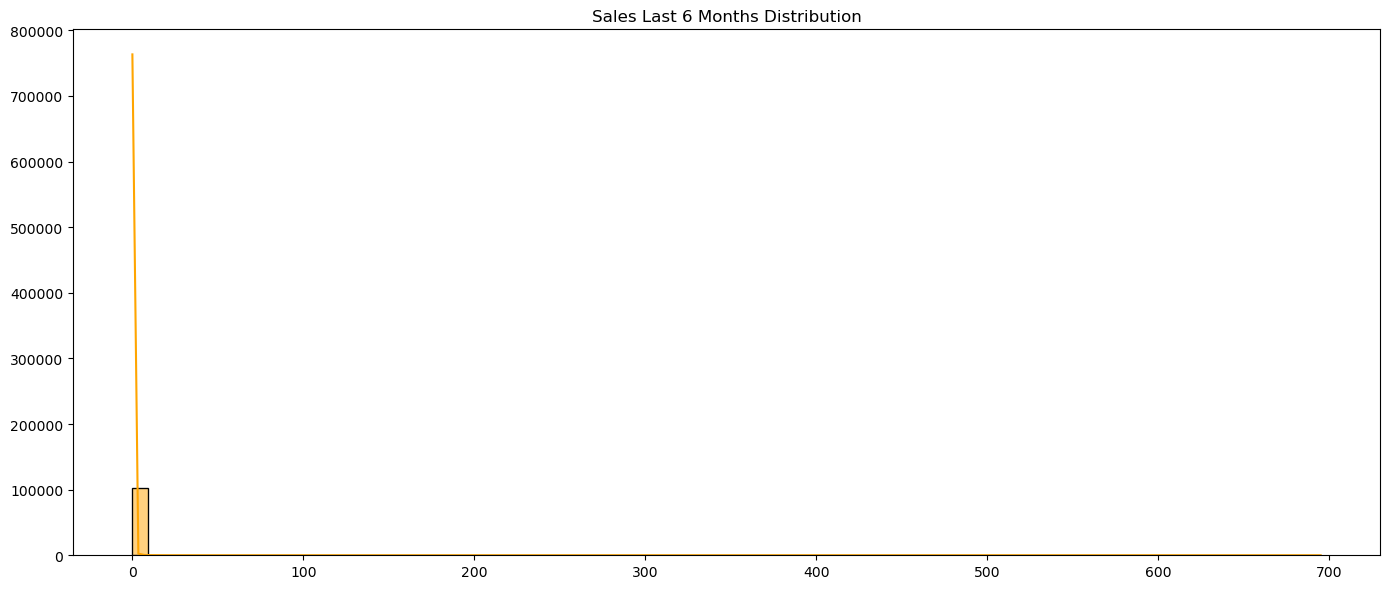

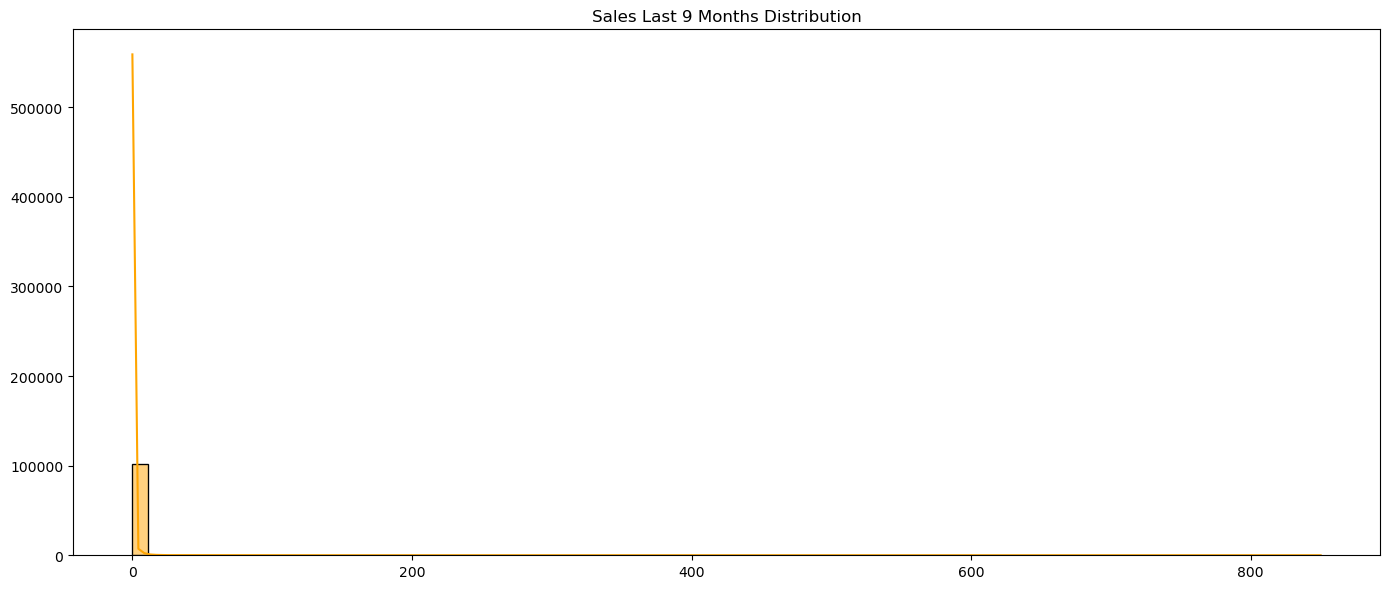

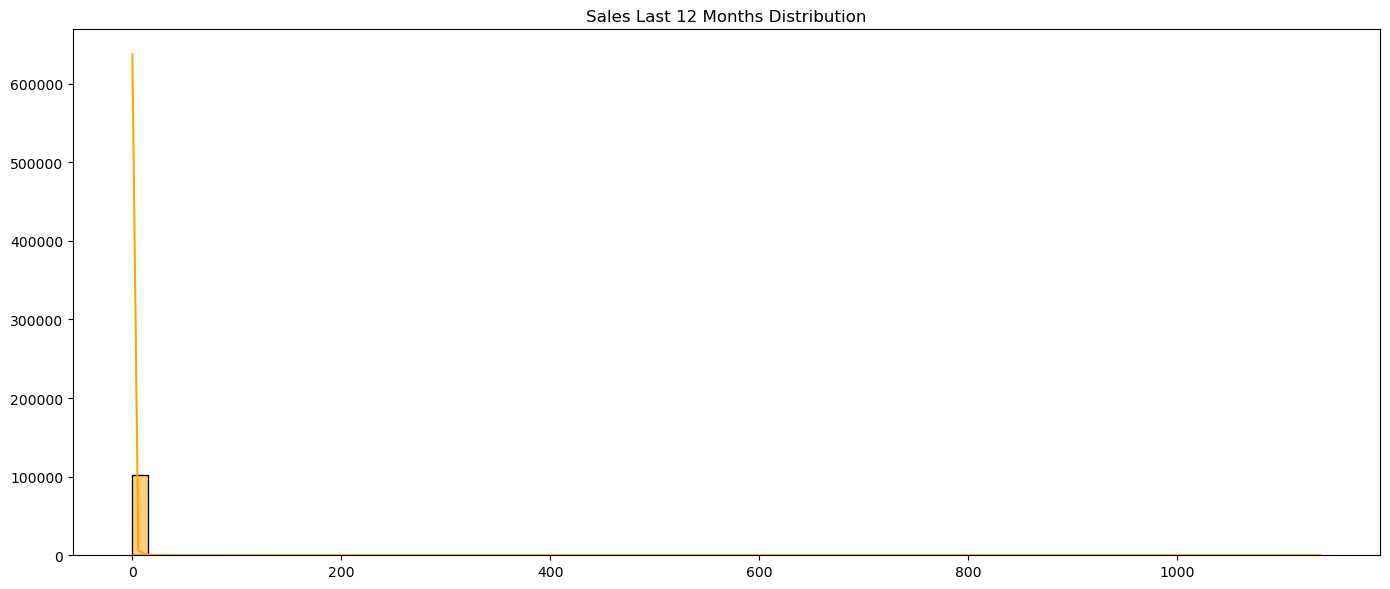

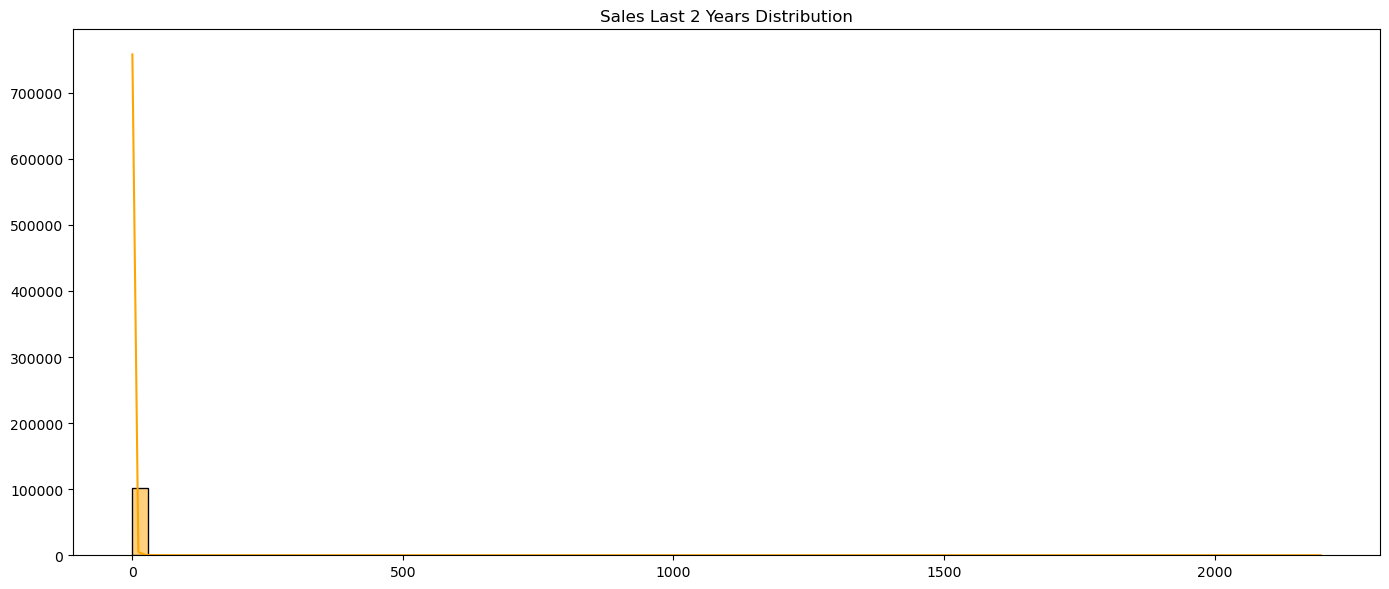

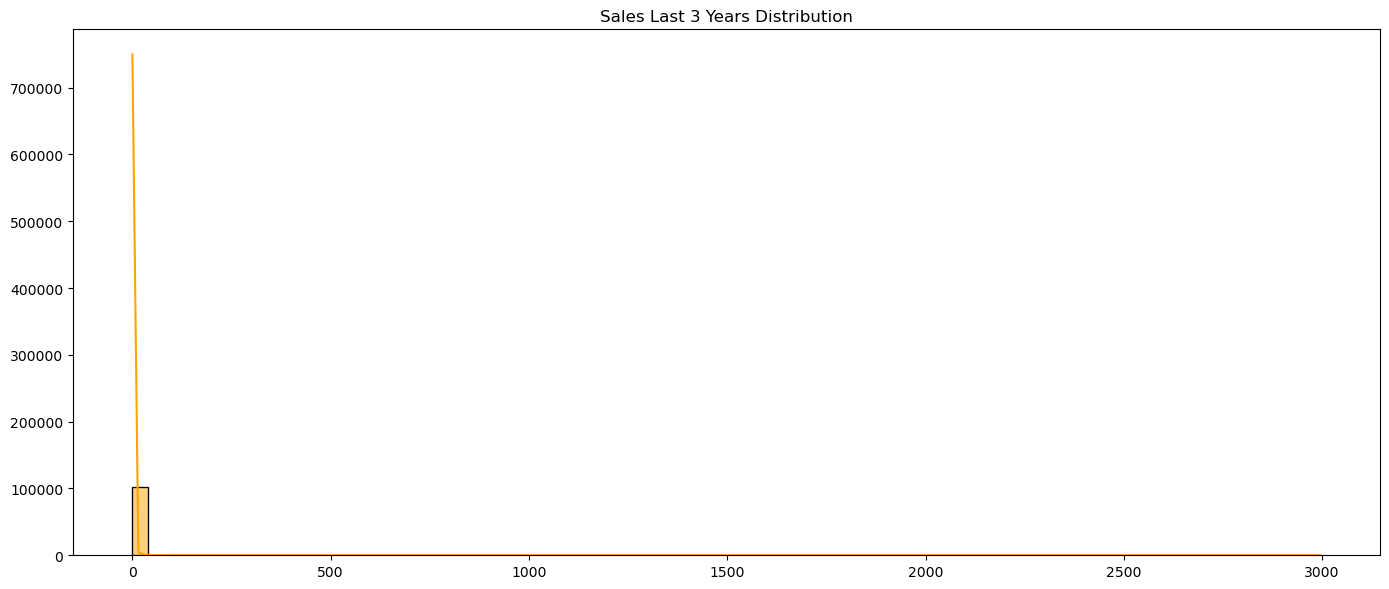

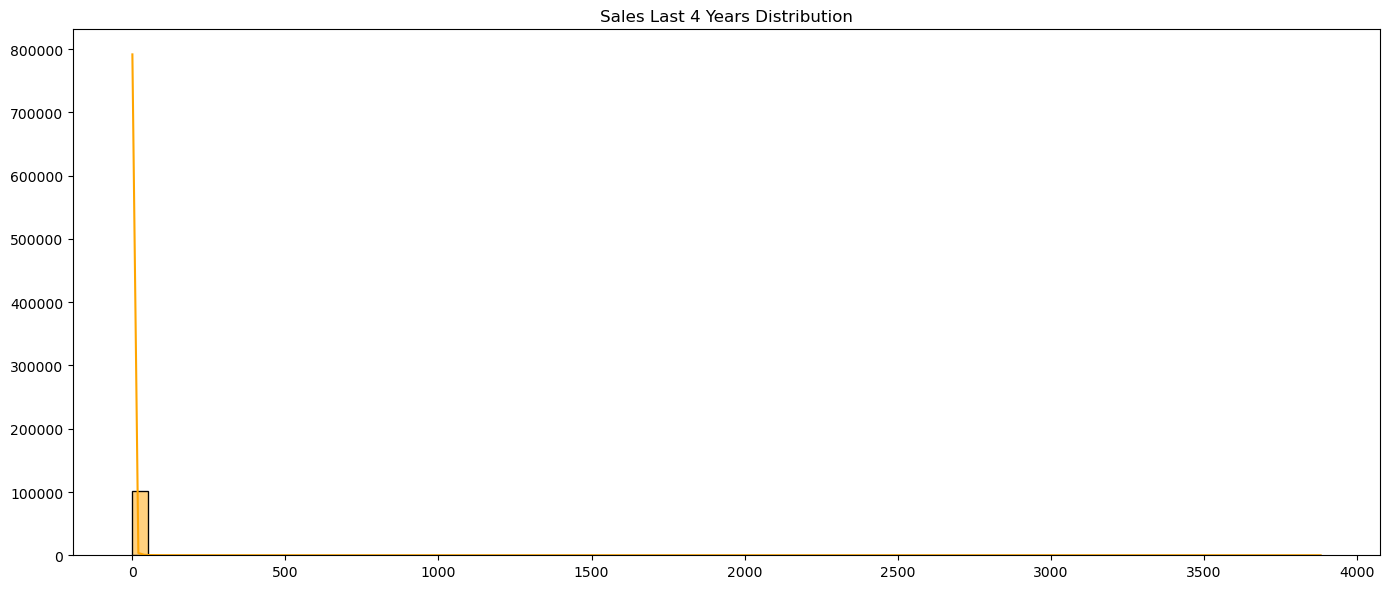

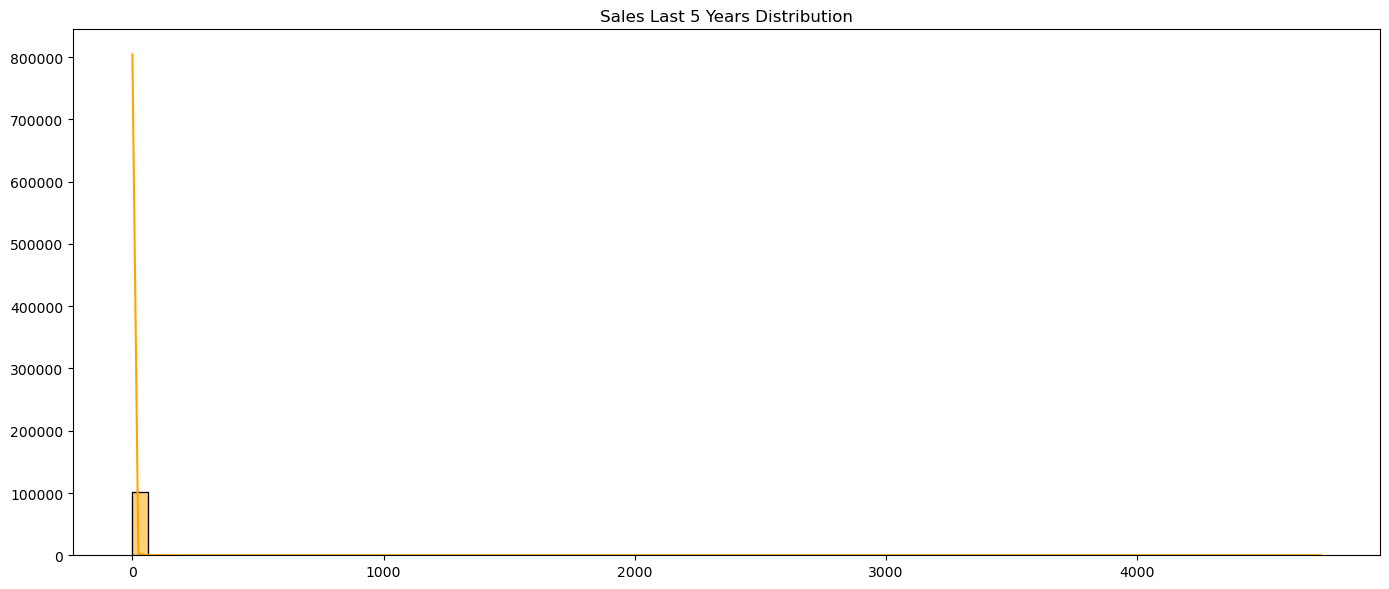

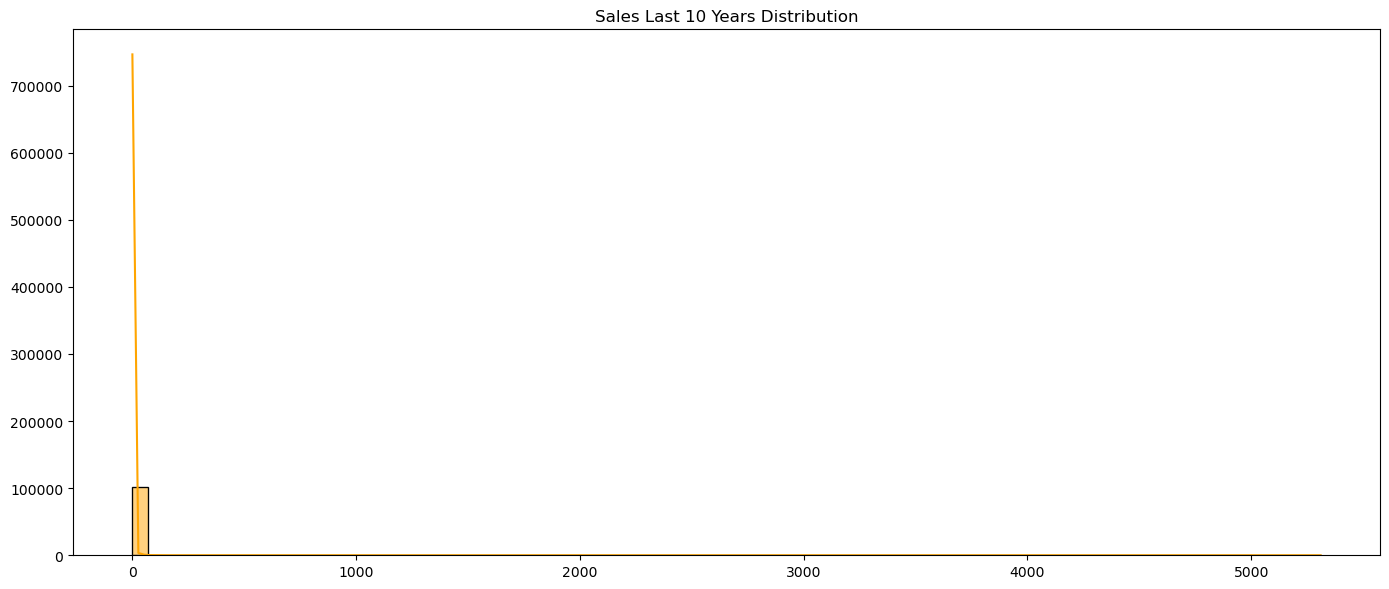

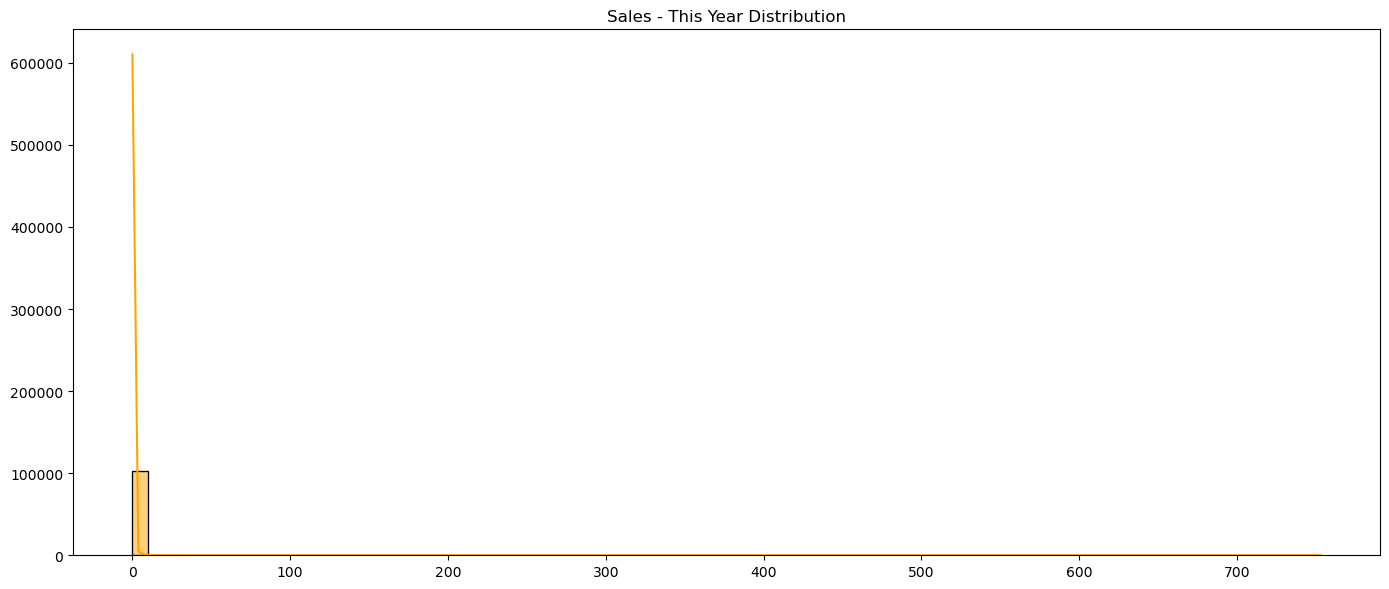

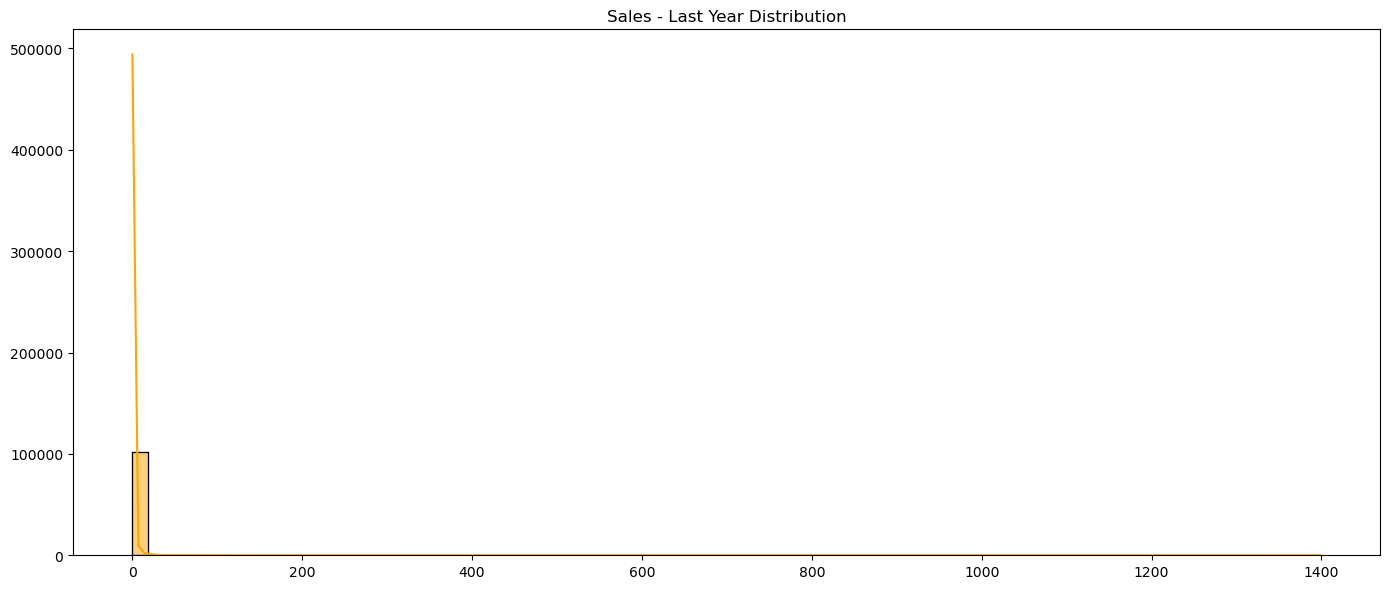

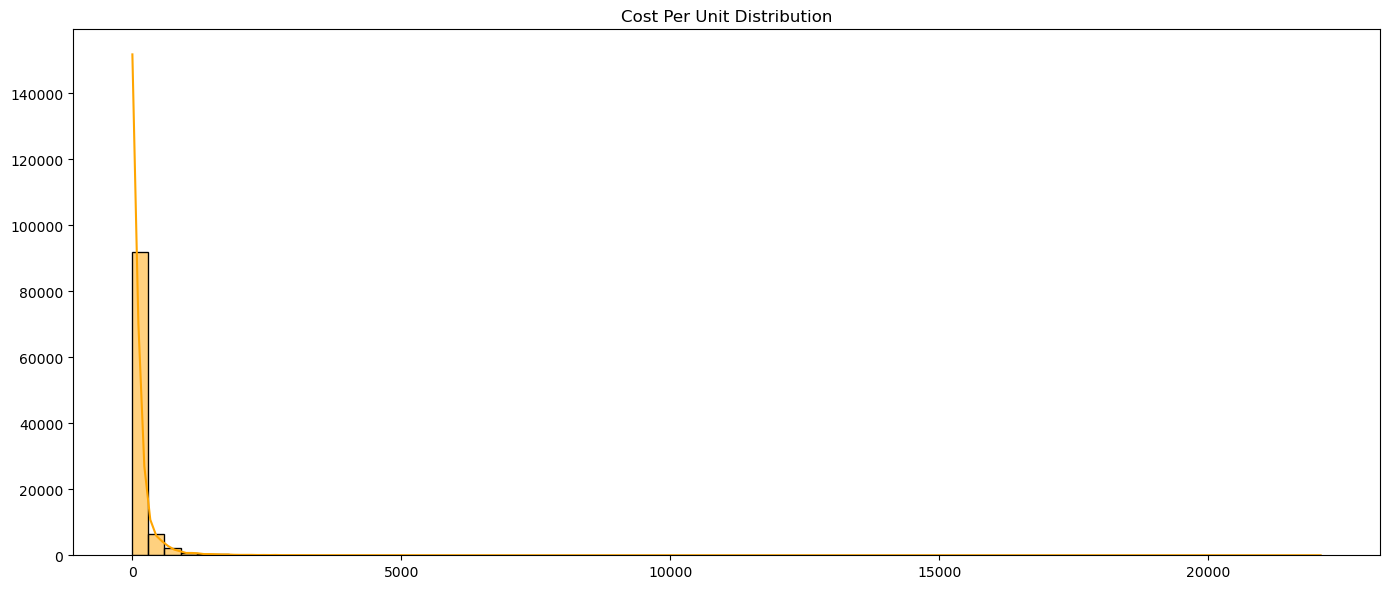

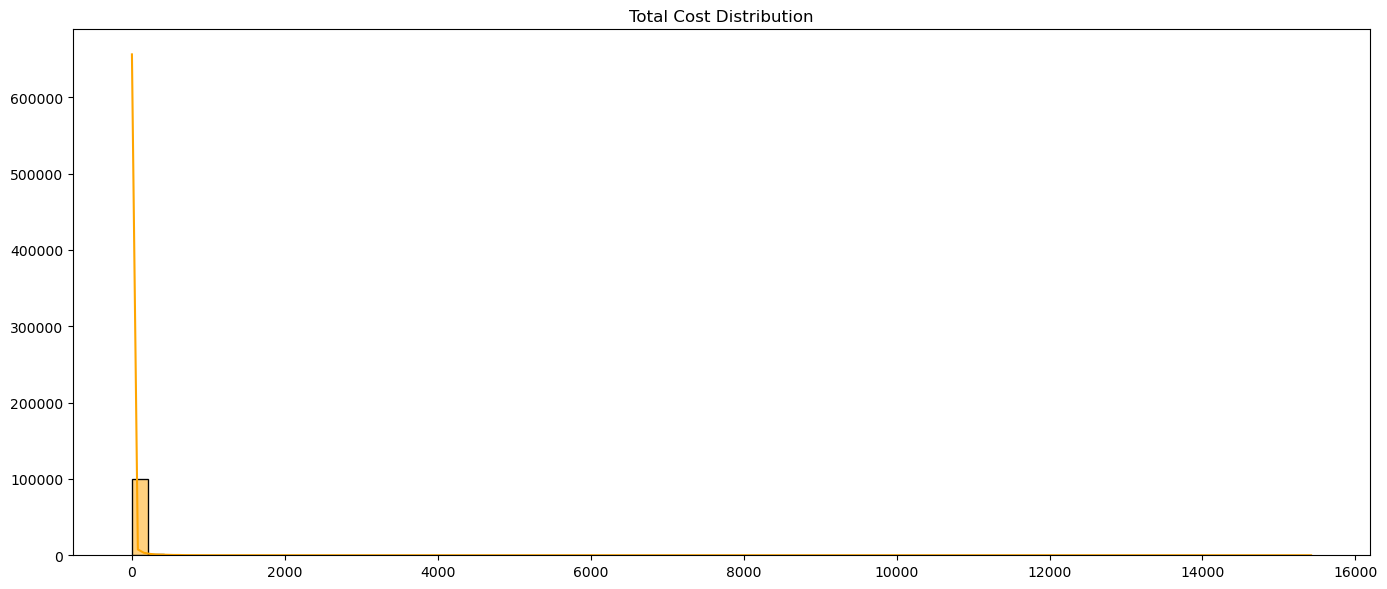

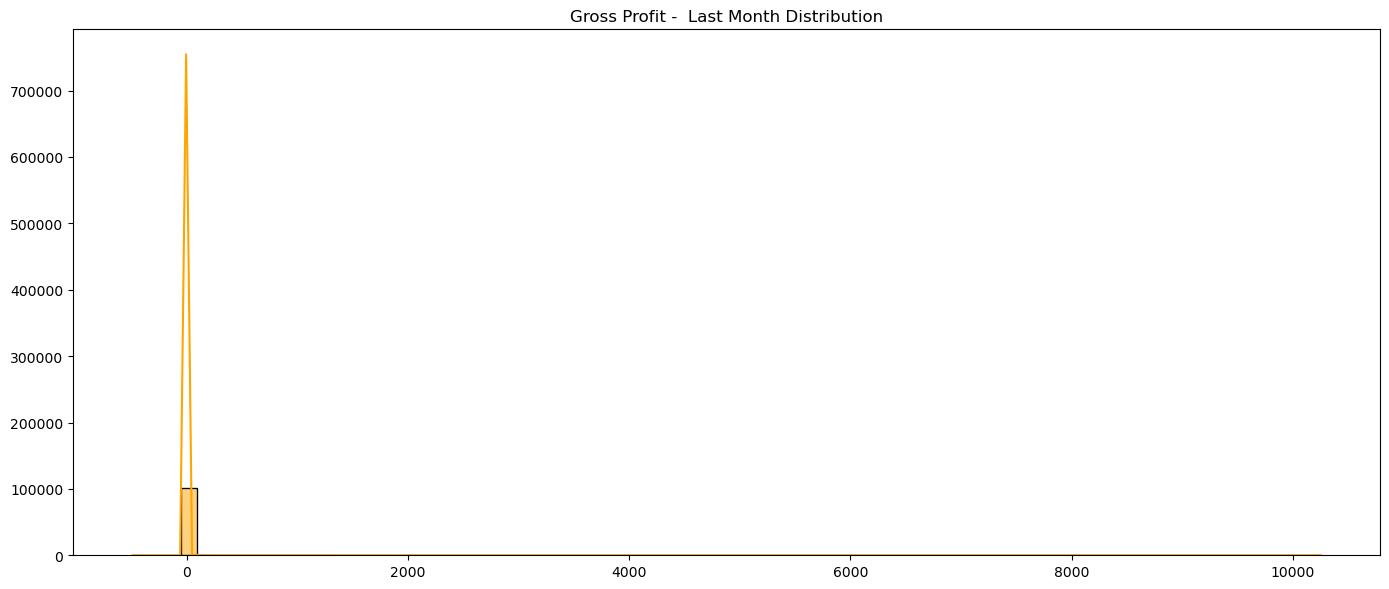

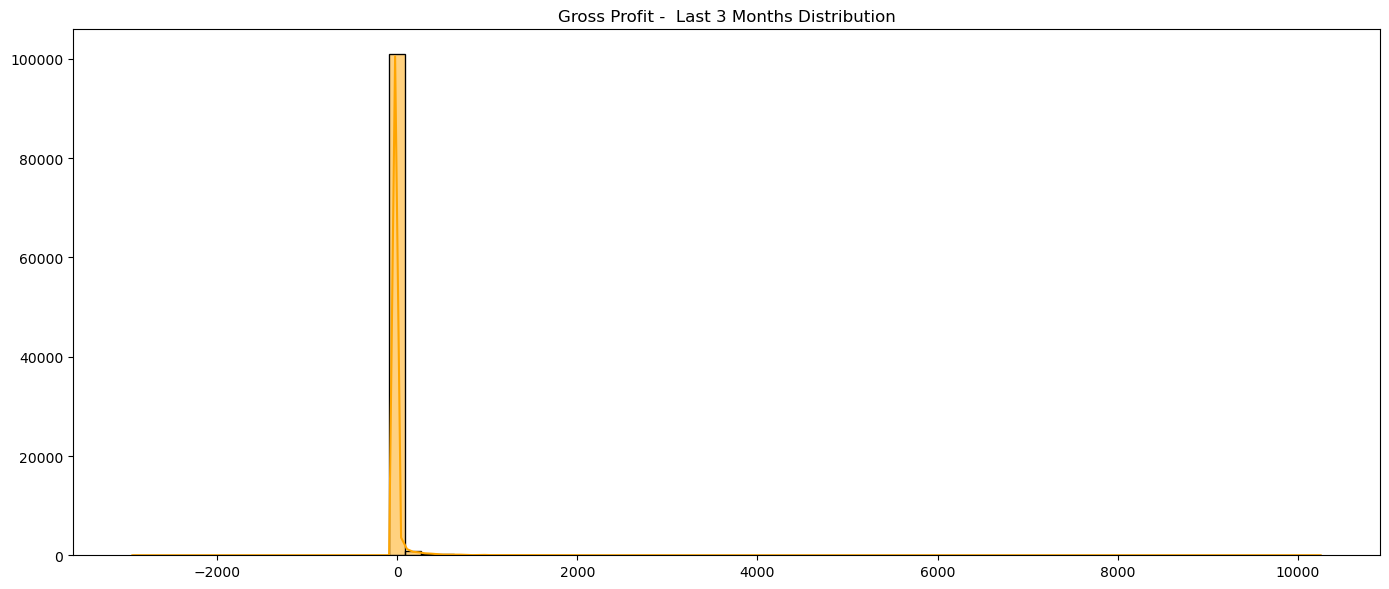

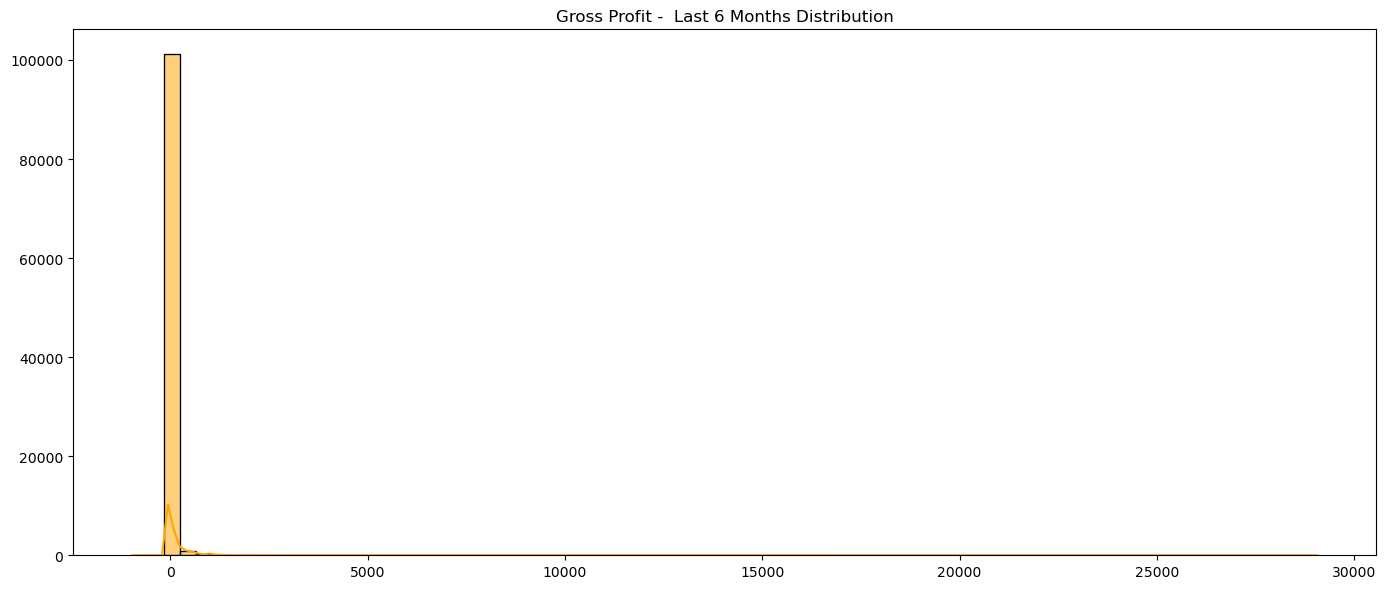

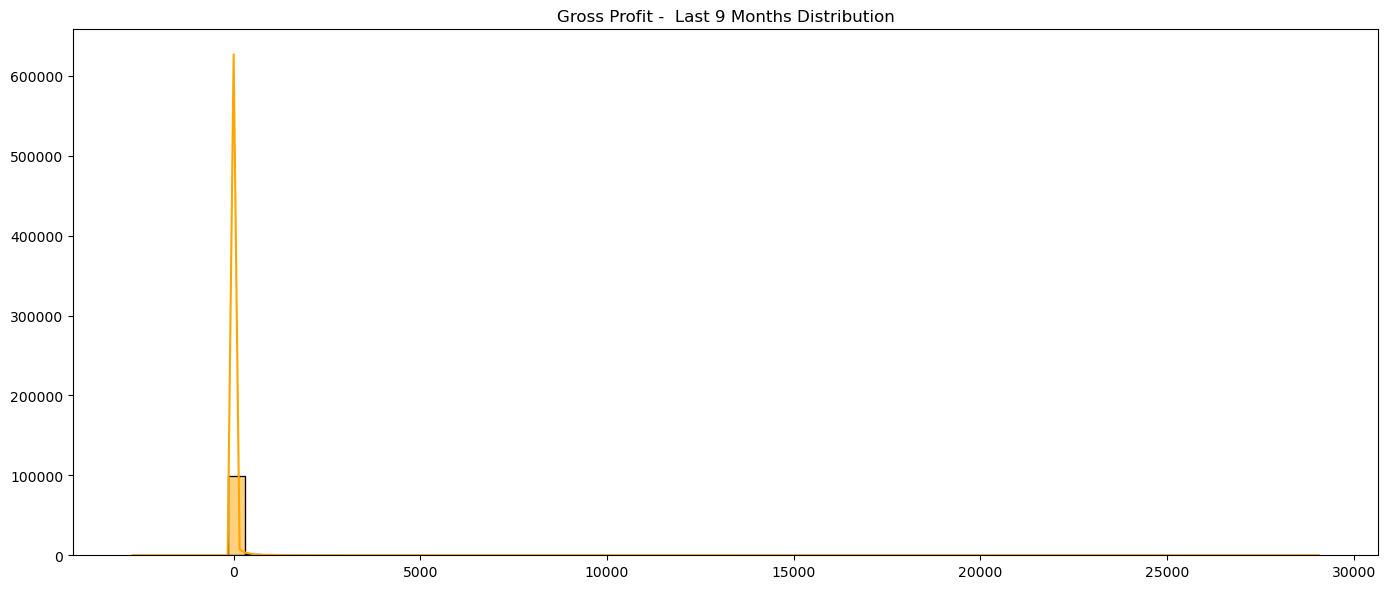

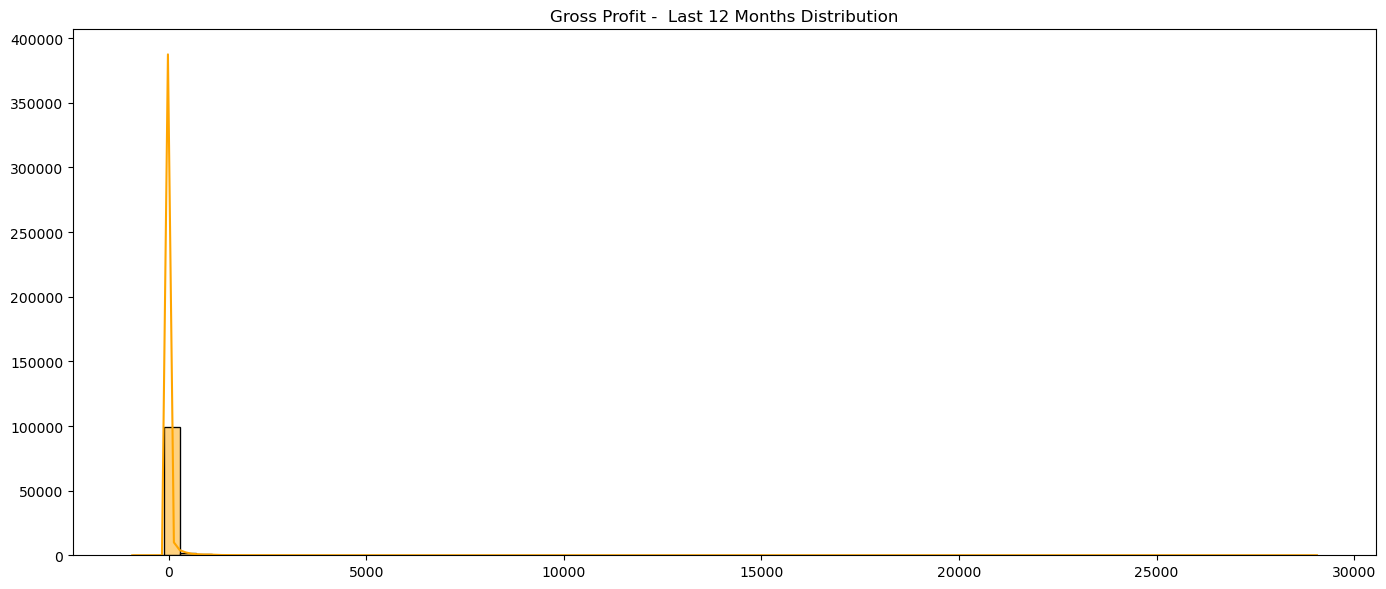

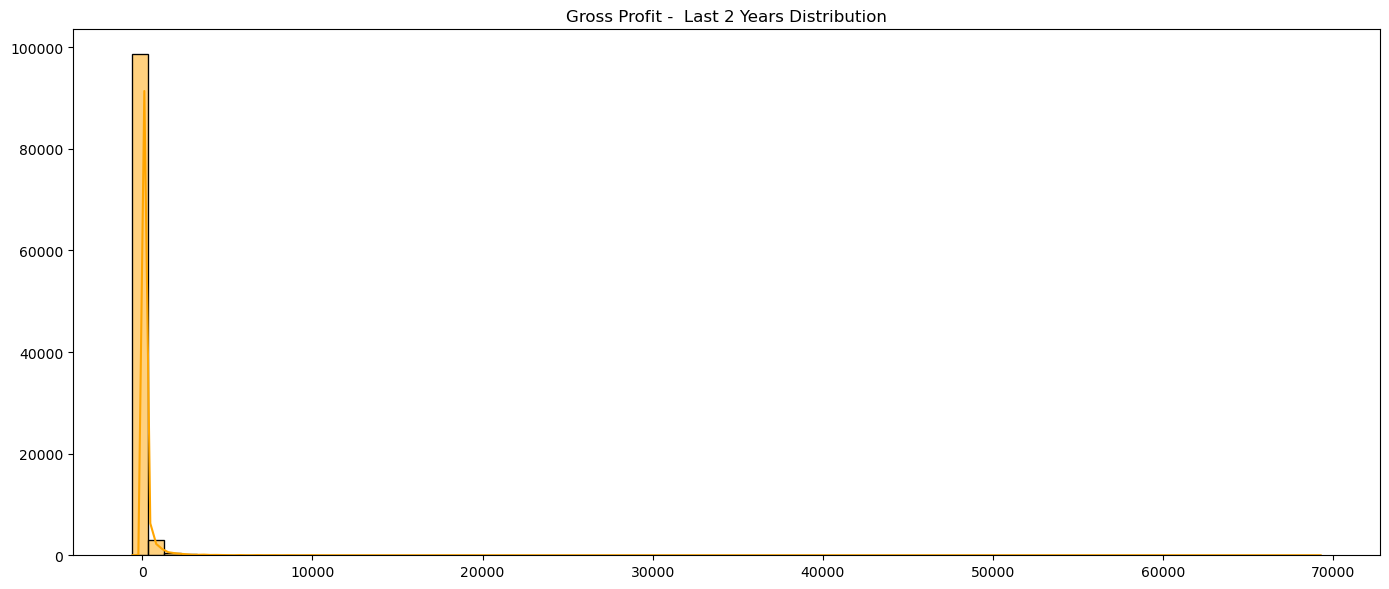

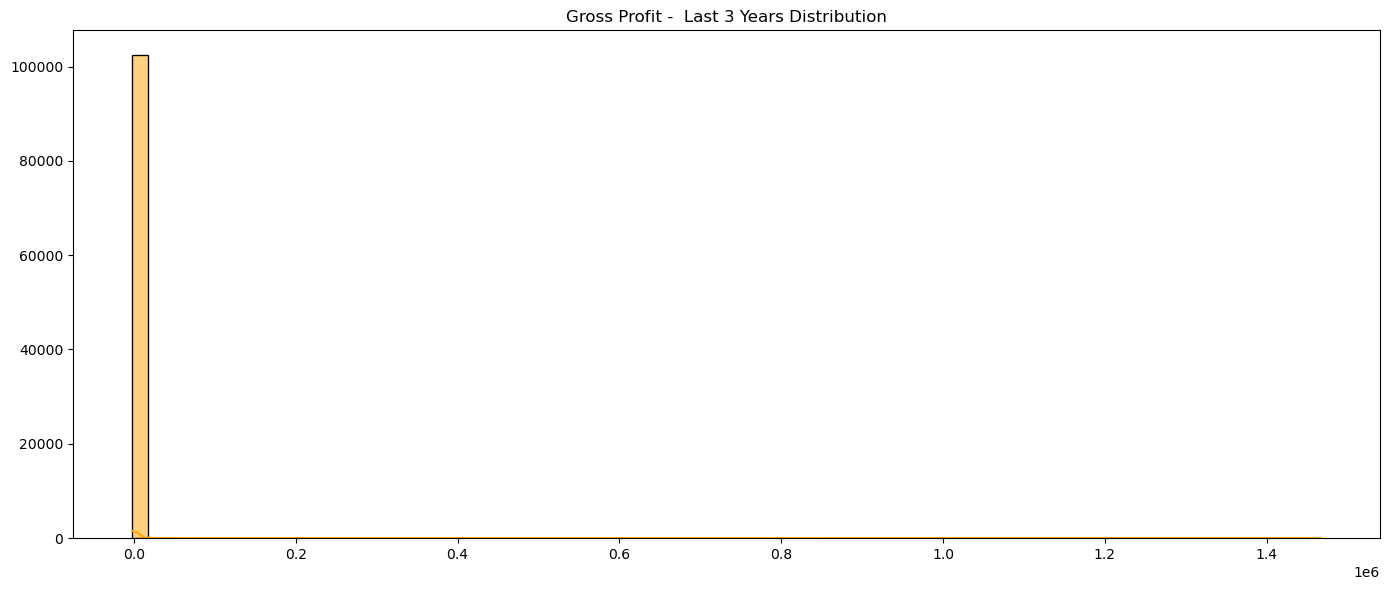

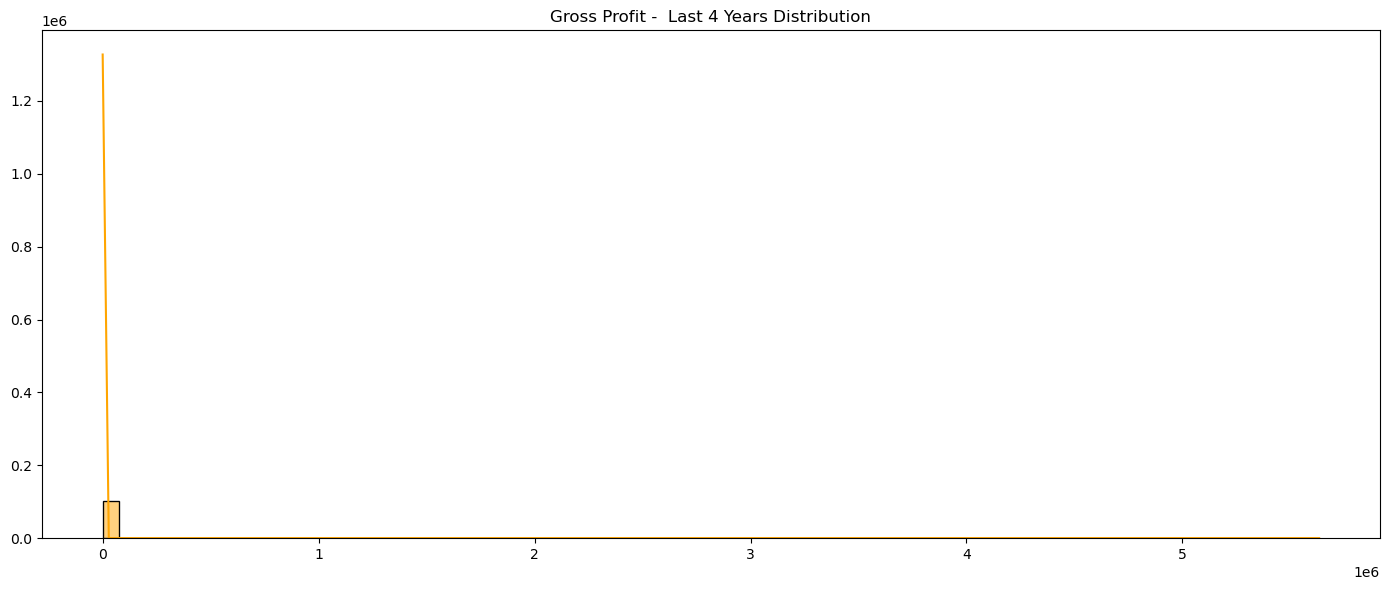

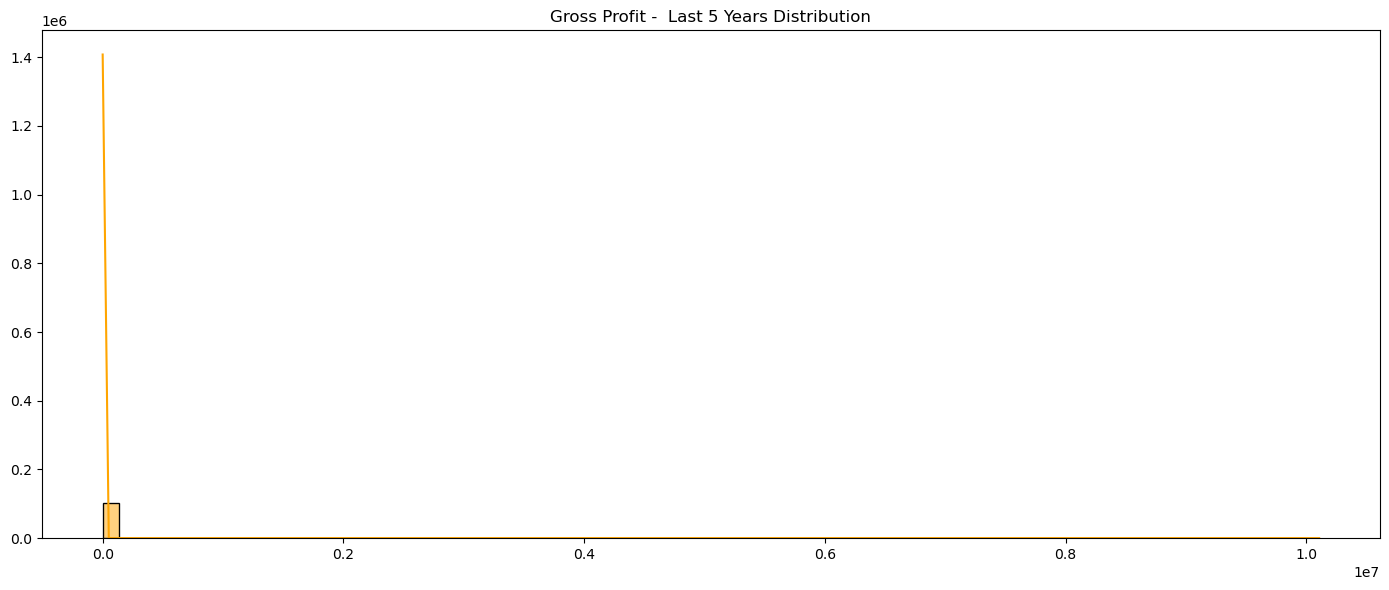

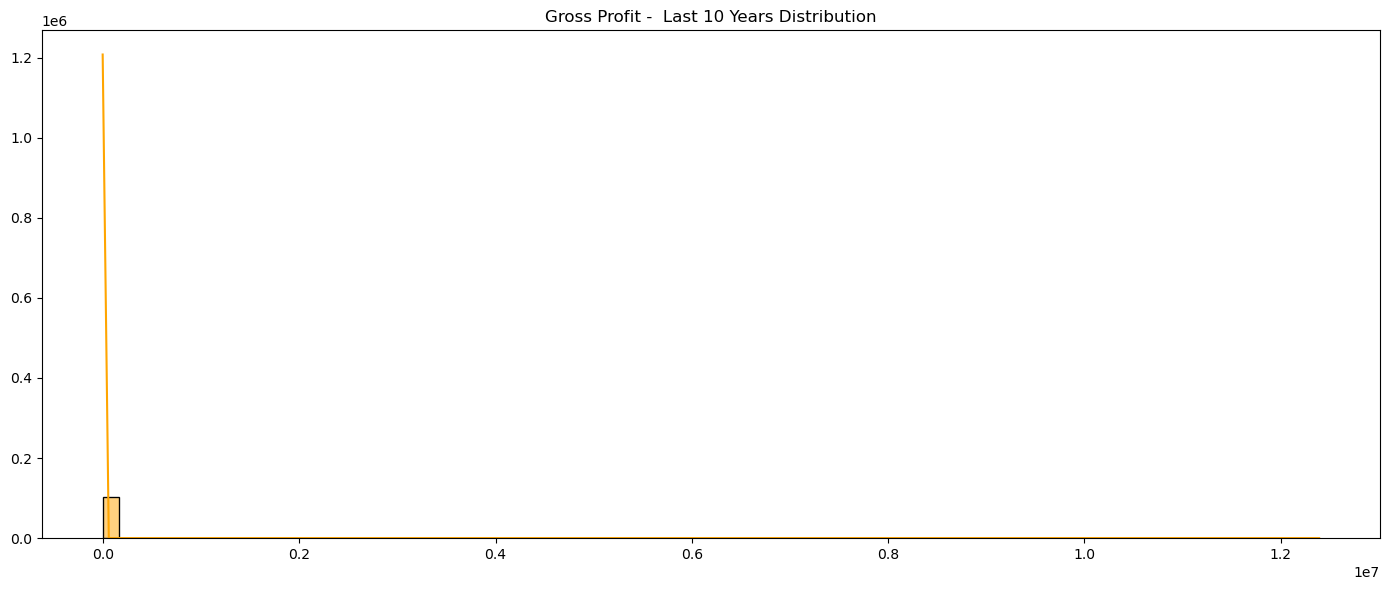

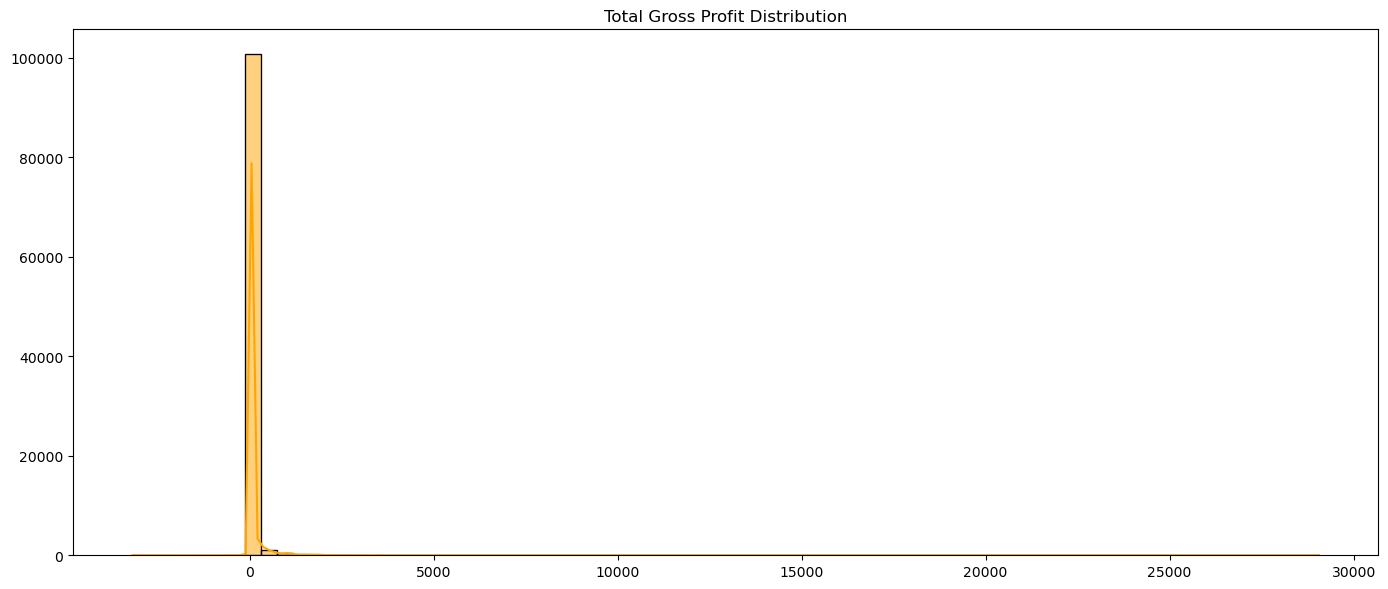

In [50]:
cols = ['Margin %','Margin', 'Price', 'Quantity', 'Sales Last Month', 
        'Sales Last 3 Months', 'Sales Last 6 Months','Sales Last 9 Months', 
        'Sales Last 12 Months', 'Sales Last 2 Years','Sales Last 3 Years', 
        'Sales Last 4 Years', 'Sales Last 5 Years','Sales Last 10 Years', 
        'Sales - This Year', 'Sales - Last Year','Cost Per Unit', 'Total Cost',
        'Gross Profit -  Last Month', 'Gross Profit -  Last 3 Months',
       'Gross Profit -  Last 6 Months', 'Gross Profit -  Last 9 Months',
       'Gross Profit -  Last 12 Months', 'Gross Profit -  Last 2 Years',
       'Gross Profit -  Last 3 Years', 'Gross Profit -  Last 4 Years',
       'Gross Profit -  Last 5 Years', 'Gross Profit -  Last 10 Years',
       'Total Gross Profit']

# Create individual plots for each column
for col in cols:
    plt.figure(figsize=(14, 6))
    sns.histplot(parts_data[col], kde=True, color='orange', bins=74)
    plt.title(f'{col} Distribution')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

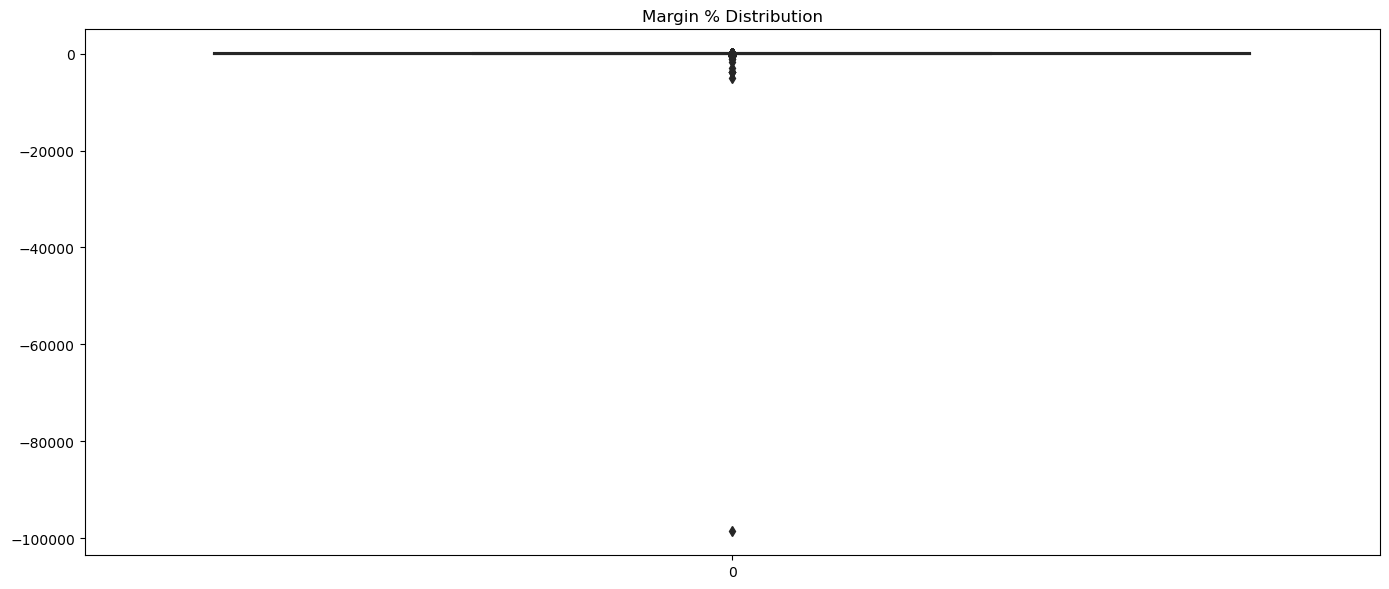

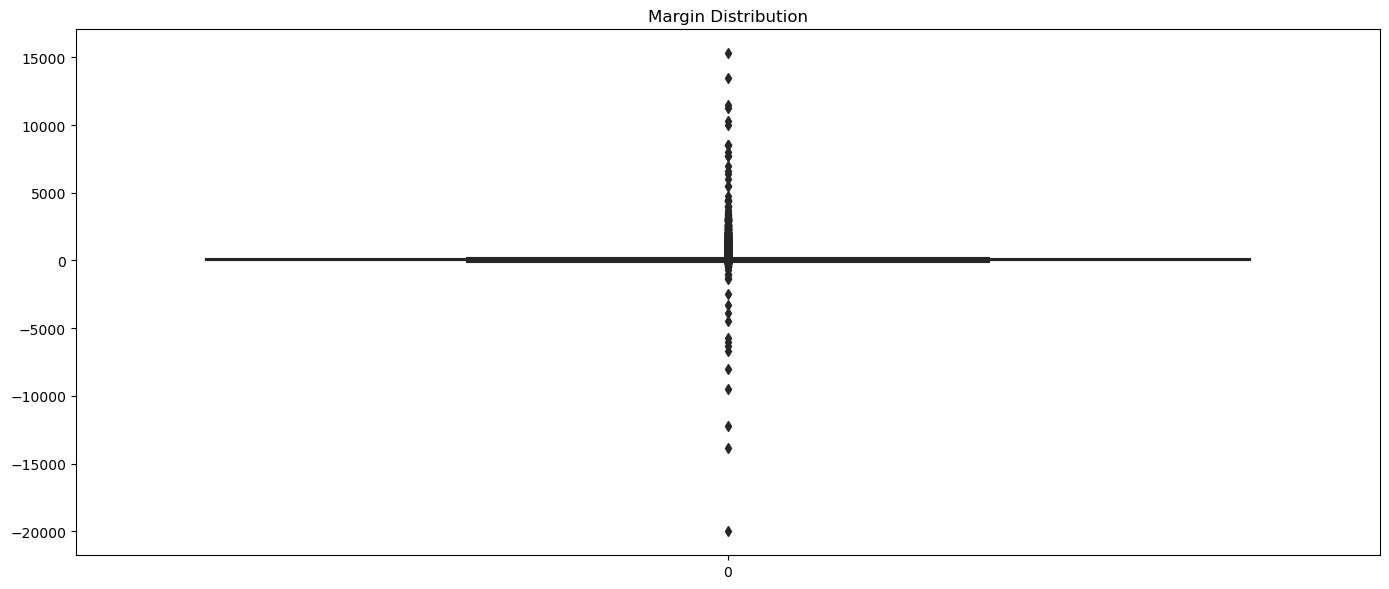

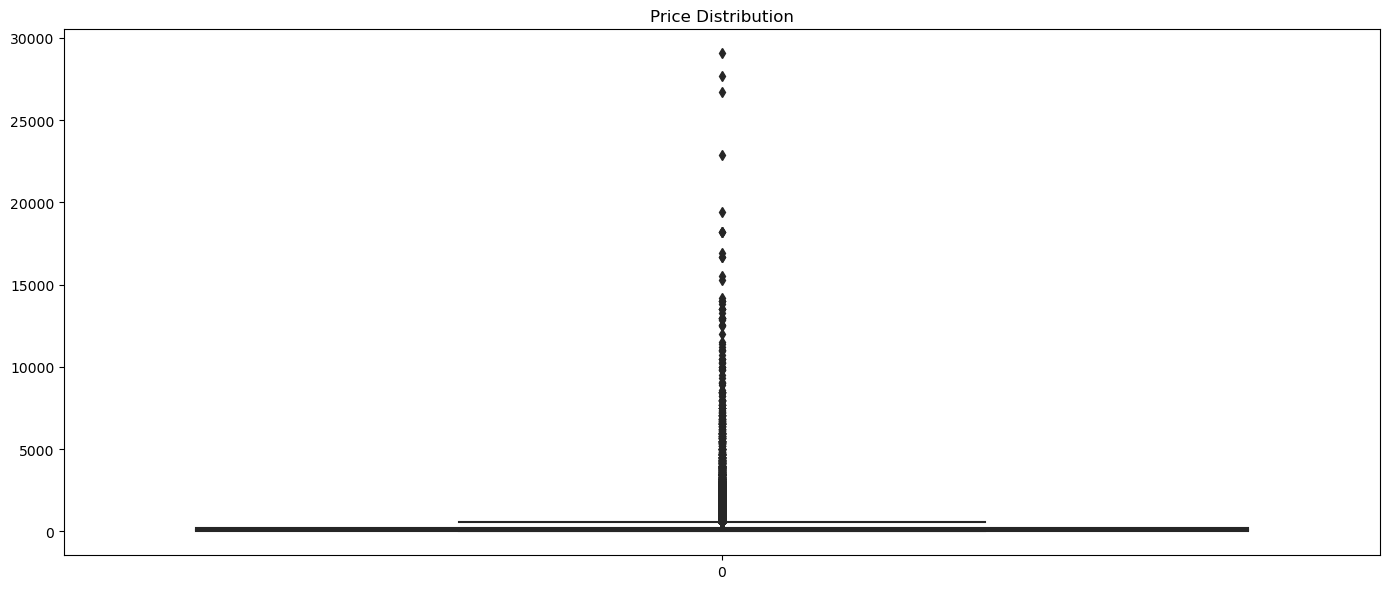

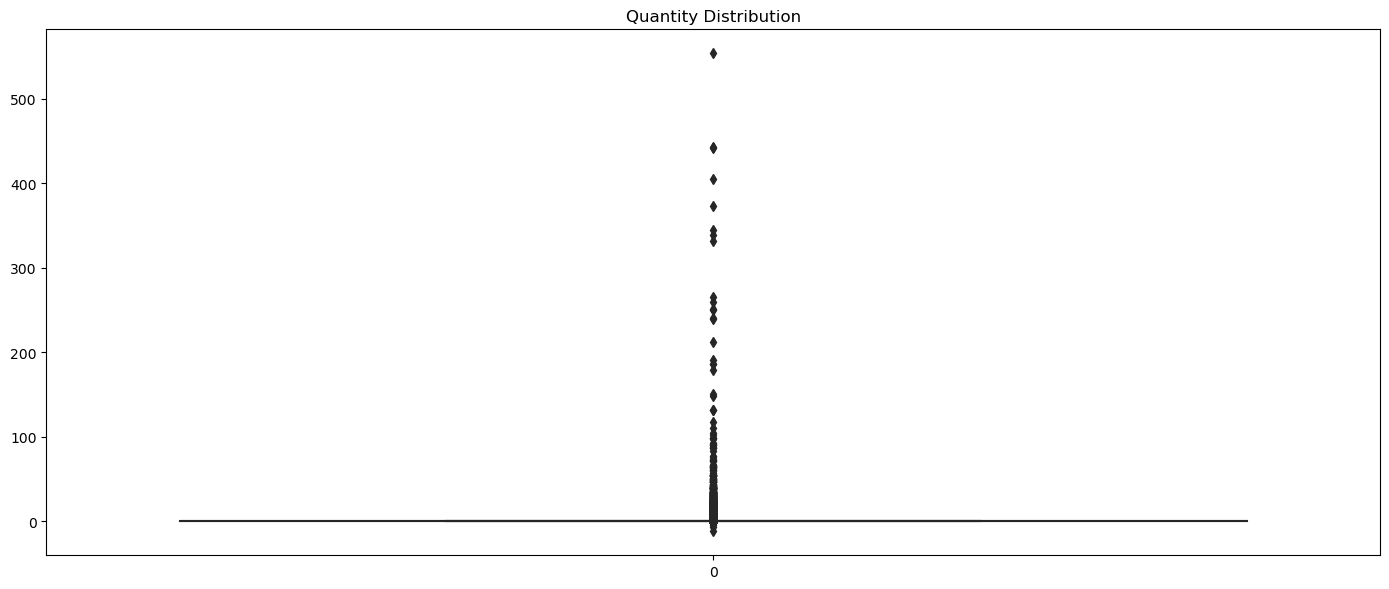

In [51]:
cols = ['Margin %', 'Margin', 'Price', 'Quantity']

# Create individual plots for each column
for col in cols:
    plt.figure(figsize=(14, 6))
    sns.boxplot(parts_data[col], color='green',)
    plt.title(f'{col} Distribution')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()